| Field            | Description                                                         | Example                                                      | Data Type |
|:-----------------|:--------------------------------------------------------------------|:-------------------------------------------------------------|:----------|
| **ID**           | Serial number                                                       | **1001**, **1002**, etc.                                    | **Integer** |
| **DEVICETYPE**   | The type of device used by the user                                  | **desktop**, **mobile**, **tablet**, **smartphone**         | **String** |
| **PLATFORM_ID**  | Unique identifier associated with the platform used by the user     | **12345**, **PLATFORM_XYZ**, **987654321**                  | **Numeric** |
| **BIDREQUESTIP** | IP address from where the request originated                        | **192.168.0.1**, **10.0.0.2**, **172.16.0.100**             | **String** |
| **USERPLATFORMUID** | Unique identifier of the user on a platform                       | **user123**, **platform_user_456**, **789user**              | **String** |
| **USERCITY**     | City of the user                                                    | **New York**, **London**, **Tokyo**                          | **String** |
| **USERZIPCODE**  | User's ZIP code                                                     | **12345**, **54321**, **98765**                              | **String** |
| **USERAGENT**    | User's browser agent                                                | **Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/...**   | **String** |
| **PLATFORMTYPE** | Type of platform being used                                          | **EHR**, **e-prescribing**, **medical journal**, **telemedicine** | **String** |
| **CHANNELTYPE**  | The channel through which the user interacts with the platform       | **website**, **email**, **mobile app**, **SMS**              | **String** |
| **URL**          | URL from which the request originated                                | **https://example.com**                                     | **String** |
| **KEYWORDS**     | Keywords appear in URLs                                             | **healthcare**, **doctor**, **medicine**, **patient care**   | **String** |
| **TAXONOMY**     | Code for specialization                                             | **cardiology**, **dermatology**, **pediatrics**, **oncology** | **String** |
| **IS_HCP**       | Indicates whether the user is a Healthcare Professional (HCP) or not | **1**, **0**                                                | **Boolean** |


##### Importing Basics Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignore warning messages
warnings.filterwarnings("ignore")

from tqdm import tqdm

In [2]:
Doceree_HCP_Sample_Submission = pd.read_csv('Doceree-HCP_Sample_Submission.csv')

In [3]:
Doceree_HCP_Train = pd.read_csv('Doceree-HCP_Train.csv', encoding='latin-1')

In [4]:
Doceree_HCP_Test = pd.read_csv('Doceree-HCP_Test.csv')

In [5]:
Doceree_HCP_Sample_Submission

,ID,IS_HCP
0,115501,1
1,115502,1
2,115503,1
3,115504,1
4,115505,1
...,...,...
28488,143989,1
28489,143990,1
28490,143991,1
28491,143992,1


In [6]:
Doceree_HCP_Train['KEYWORDS'] = Doceree_HCP_Train['KEYWORDS'].str.split('|')
Doceree_HCP_Test['KEYWORDS'] = Doceree_HCP_Test['KEYWORDS'].str.split('|')

# Print the extracted keywords for the first row
Doceree_HCP_Test['KEYWORDS']

0        [Family Practice, Drainage, Clinical, Dermatol...
1        [General, Clinical, Operative, Medicine, Cardi...
2        [Abortion, Anxiety Disorders, Apnea, False, Tr...
3        [Health, Male, Neurological Surgery, Otolaryng...
4        [chronic kidney disease, pain, nephrology, dis...
                               ...                        
28488    [Transplantation, Psychiatry, Heart Failure, A...
28489    [small, hospitals, nephrology, emergency medic...
28490    [small, hospitals, nephrology, emergency medic...
28491    [the, disease, pain, radiology, lung abscess, ...
28492    [Medicine, General, Clinical, False, Urology, ...
Name: KEYWORDS, Length: 28493, dtype: object

In [7]:
Doceree_HCP_Train

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,"[General, Endocrine, False, Medicine, Surgery,...",NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,"[Bone Marrow, Radiography, Chronic, Oncology, ...",NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,"[General, Endocrine, False, Medicine, Surgery,...",NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,"[Dental, Total, Clinical, Pharmacology, Physic...",2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,"[Critical Care, Emergency Medicine, General Pr...",NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,114933,Desktop,2,68.82.97.126,051e4a06-4cb4-4b97-b0b1-d1c6a2b8e2c2,Philadelphia,19120.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/consultat...,"[Cardiovascular, Clinical, False, Male, Oncolo...",207RP1001X,1.0
113933,114934,Desktop,2,104.172.11.109,3289bba5-4a50-4b61-a5cc-68596bbdc2bf,Van Nuys,914014213.0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,"[Asthma, Arthritis, General, Clinical, Diagnos...",2084P0800X,1.0
113934,114935,Desktop,7,174.21.94.113,9c36e90c-caa7-4323-8431-fb84f8293972,NaN,98105.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/39455-whats-th...,"[Rehabilitation, Transplantation, Clinical, Pr...",208000000X,1.0
113935,114936,Mobile,2,69.253.129.131,afc27760-31f7-4f6e-aa08-90d8a96525d0,Wilmington,19808.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.dermatologyadvisor.com/home/topics...,"[pain, disease, autoimmune, multiple sclerosis...",2084P0800X,1.0


In [8]:
Doceree_HCP_Train['TAXONOMY'].value_counts()

2084P0800X    7930
2084N0400X    6621
207Q00000X    3997
207R00000X    3190
208000000X     837
              ... 
163WC0400X       1
246QM0706X       1
1835N1003X       1
207RI0008X       1
207XX0801X       1
Name: TAXONOMY, Length: 207, dtype: int64

In [9]:
Doceree_HCP_Train['PLATFORMTYPE'].value_counts()

Online Medical Journal      110120
Online Learning Portal        2978
Medical News Platform          798
Electronic Health Record        40
Tele-medicine Platform           1
Name: PLATFORMTYPE, dtype: int64

In [10]:
Doceree_HCP_Train['URL'].nunique()

5231

In [11]:
# Select columns that are not of list type
non_list_columns = [col for col in Doceree_HCP_Train.columns if not any(isinstance(val, list) for val in Doceree_HCP_Train[col])]

# Convert non-list columns to categorical
Doceree_HCP_Train[non_list_columns] = Doceree_HCP_Train[non_list_columns].astype('category')

In [12]:
# Select columns that are not of list type
non_list_columns = [col for col in Doceree_HCP_Test.columns if not any(isinstance(val, list) for val in Doceree_HCP_Test[col])]

# Convert non-list columns to categorical
Doceree_HCP_Test[non_list_columns] = Doceree_HCP_Test[non_list_columns].astype('category')

In [13]:
Doceree_HCP_Train.describe()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
count,113937,113937,113937,113937,113933,107578,109345.0,113935,113937,113937,113937,113937,32313,113936.0
unique,113937,4,15,33664,53780,4420,11278.0,4288,5,1,5231,2460,207,2.0
top,1001,Desktop,2,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,New York,63169.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,"[Family Practice, Drainage, Clinical, Dermatol...",2084P0800X,0.0
freq,1,78423,79151,1718,1447,4943,2116.0,8380,110120,113937,5310,5317,7930,79756.0


In [14]:
Doceree_HCP_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ID               113937 non-null  category
 1   DEVICETYPE       113937 non-null  category
 2   PLATFORM_ID      113937 non-null  category
 3   BIDREQUESTIP     113937 non-null  category
 4   USERPLATFORMUID  113933 non-null  category
 5   USERCITY         107578 non-null  category
 6   USERZIPCODE      109345 non-null  category
 7   USERAGENT        113935 non-null  category
 8   PLATFORMTYPE     113937 non-null  category
 9   CHANNELTYPE      113937 non-null  category
 10  URL              113937 non-null  category
 11  KEYWORDS         113937 non-null  object  
 12  TAXONOMY         32313 non-null   category
 13  IS_HCP           113936 non-null  category
dtypes: category(13), object(1)
memory usage: 13.2+ MB


In [15]:
# import time
# from tqdm import tqdm_notebook

# start_time = time.time()

# # Convert 'KEYWORDS' column from list to string type
# Doceree_HCP_Train['KEYWORDS'] = Doceree_HCP_Train['KEYWORDS'].apply(lambda x: ' '.join(x))

# # Convert keywords to lowercase
# Doceree_HCP_Train['KEYWORDS'] = Doceree_HCP_Train['KEYWORDS'].str.lower()

# # Split keywords into individual words
# Doceree_HCP_Train['KEYWORDS'] = Doceree_HCP_Train['KEYWORDS'].str.split()

# # Determine unique keywords
# unique_keywords = set(Doceree_HCP_Train['KEYWORDS'].explode())

# # Create new columns for each unique keyword
# for keyword in tqdm_notebook(unique_keywords, desc='Creating New Columns'):
#     Doceree_HCP_Train[keyword] = 0

# # Assign values of 1 or 0 to keyword columns based on their presence in the keyword list
# for keyword in tqdm_notebook(unique_keywords, desc='Assigning Keyword Values'):
#     Doceree_HCP_Train[keyword] = Doceree_HCP_Train['KEYWORDS'].apply(lambda x: int(keyword in x))

# end_time = time.time()
# execution_time = end_time - start_time

# print(f"Execution time: {execution_time} seconds")


In [16]:
# Doceree_HCP_Train.to_csv('Manupulated_data.csv')

In [17]:
# df = pd.read_csv('Manupulated_data.csv', index_col=False)

In [18]:
# import time
# from tqdm import tqdm_notebook

# start_time = time.time()

# # Convert 'KEYWORDS' column from list to string type
# Doceree_HCP_Train['KEYWORDS'] = Doceree_HCP_Train['KEYWORDS'].apply(lambda x: ' '.join(x))

# # Convert keywords to lowercase
# Doceree_HCP_Train['KEYWORDS'] = Doceree_HCP_Train['KEYWORDS'].str.lower()

# # Split keywords into individual words
# Doceree_HCP_Train['KEYWORDS'] = Doceree_HCP_Train['KEYWORDS'].str.split()



# # Convert 'KEYWORDS' column from list to string type
# Doceree_HCP_Test['KEYWORDS'] = Doceree_HCP_Test['KEYWORDS'].apply(lambda x: ' '.join(x))

# # Convert keywords to lowercase
# Doceree_HCP_Test['KEYWORDS'] = Doceree_HCP_Test['KEYWORDS'].str.lower()

# # Split keywords into individual words
# Doceree_HCP_Test['KEYWORDS'] = Doceree_HCP_Test['KEYWORDS'].str.split()

# # Determine unique keywords
# unique_keywords = set(Doceree_HCP_Train['KEYWORDS'].explode())

# # Create new columns for each unique keyword
# for keyword in tqdm_notebook(unique_keywords, desc='Creating New Columns'):
#     Doceree_HCP_Test[keyword] = 0

# # Assign values of 1 or 0 to keyword columns based on their presence in the keyword list
# for keyword in tqdm_notebook(unique_keywords, desc='Assigning Keyword Values'):
#     Doceree_HCP_Test[keyword] = Doceree_HCP_Test['KEYWORDS'].apply(lambda x: int(keyword in x))

# end_time = time.time()
# execution_time = end_time - start_time

# print(f"Execution time: {execution_time} seconds")


In [19]:
# Doceree_HCP_Test.to_csv('Manupulated_data_test.csv')

In [20]:
# df

In [21]:
Doceree_HCP_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ID               113937 non-null  category
 1   DEVICETYPE       113937 non-null  category
 2   PLATFORM_ID      113937 non-null  category
 3   BIDREQUESTIP     113937 non-null  category
 4   USERPLATFORMUID  113933 non-null  category
 5   USERCITY         107578 non-null  category
 6   USERZIPCODE      109345 non-null  category
 7   USERAGENT        113935 non-null  category
 8   PLATFORMTYPE     113937 non-null  category
 9   CHANNELTYPE      113937 non-null  category
 10  URL              113937 non-null  category
 11  KEYWORDS         113937 non-null  object  
 12  TAXONOMY         32313 non-null   category
 13  IS_HCP           113936 non-null  category
dtypes: category(13), object(1)
memory usage: 13.2+ MB


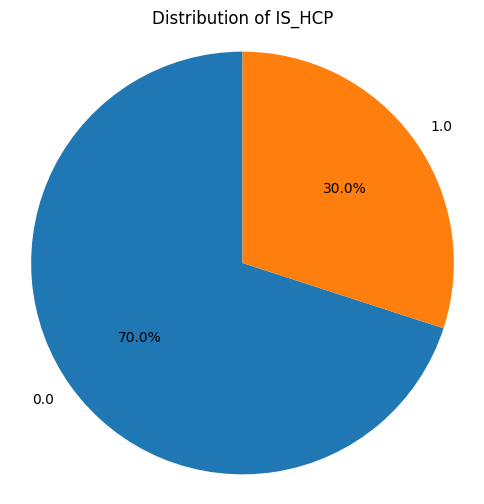

In [22]:
# Assuming your DataFrame is named 'df'
count_hcp = Doceree_HCP_Train['IS_HCP'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(count_hcp, labels=count_hcp.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of IS_HCP')
plt.axis('equal')

# Display the chart
plt.show()

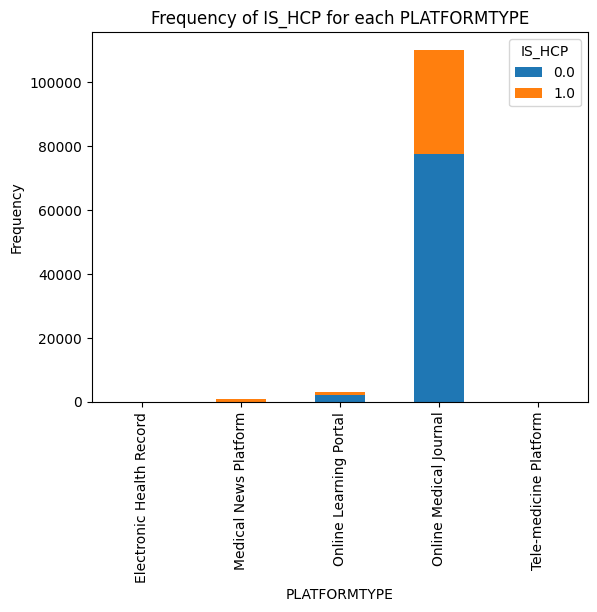

In [23]:
# Assuming your DataFrame is named 'Doceree_HCP_Train'
df = Doceree_HCP_Train.copy()

# Filter out rows with null values in IS_HCP column
df = df.dropna(subset=['IS_HCP'])

# Group by PLATFORMTYPE and IS_HCP, and count the occurrences
counts = df.groupby(['PLATFORMTYPE', 'IS_HCP']).size().unstack()

# Create a stacked bar chart
counts.plot(kind='bar', stacked=True)

# Set the chart title and labels
plt.title('Frequency of IS_HCP for each PLATFORMTYPE')
plt.xlabel('PLATFORMTYPE')
plt.ylabel('Frequency')

# Show the chart
plt.show()

In [24]:
#!pip install user_agent
# !pip install user-agents


In [25]:

from user_agents import parse

# Assuming your DataFrame is named 'Doceree_HCP_Train'
user_agent_details = Doceree_HCP_Train['USERAGENT'].apply(lambda x: parse(x))

# Extract browser details
Doceree_HCP_Train['Browser'] = user_agent_details.apply(lambda ua: ua.browser.family)
Doceree_HCP_Train['Browser_Version'] = user_agent_details.apply(lambda ua: ua.browser.version_string)

# Extract operating system details
Doceree_HCP_Train['OS'] = user_agent_details.apply(lambda ua: ua.os.family)
Doceree_HCP_Train['OS_Version'] = user_agent_details.apply(lambda ua: ua.os.version_string)

# Extract device details
Doceree_HCP_Train['Device'] = user_agent_details.apply(lambda ua: ua.device.family)

# You can add more attributes based on your requirements

# Print the updated DataFrame
print(Doceree_HCP_Train)


            ID DEVICETYPE PLATFORM_ID    BIDREQUESTIP  \
0         1001    Desktop           2    170.173.0.22   
1         1002    Desktop           2   65.216.253.25   
2         1003    Desktop           2    66.232.79.22   
3         1004    Desktop           3  137.54.125.246   
4         1005     Mobile           7  174.202.231.99   
...        ...        ...         ...             ...   
113932  114933    Desktop           2    68.82.97.126   
113933  114934    Desktop           2  104.172.11.109   
113934  114935    Desktop           7   174.21.94.113   
113935  114936     Mobile           2  69.253.129.131   
113936  114937     Mobile           2  108.41.233.175   

                             USERPLATFORMUID      USERCITY  USERZIPCODE  \
0       6974dcaa-f932-480e-9fb5-c52e20e1393a      Portland      97206.0   
1       c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf     Arlington      22202.0   
2       a698de4b-e200-46dd-b5fb-40402175ae18   New Meadows      83654.0   
3       4596753

In [26]:
Doceree_HCP_Train

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP,Browser,Browser_Version,OS,OS_Version,Device
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,"[General, Endocrine, False, Medicine, Surgery,...",NaN,0.0,Chrome,112.0.0,Windows,10,Other
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,"[Bone Marrow, Radiography, Chronic, Oncology, ...",NaN,0.0,Safari,16.3,Mac OS X,10.15.7,Mac
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,"[General, Endocrine, False, Medicine, Surgery,...",NaN,0.0,Safari,16.3,Mac OS X,10.15.7,Mac
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,"[Dental, Total, Clinical, Pharmacology, Physic...",2084P0800X,1.0,Edge,97.0.1072,Windows,10,Other
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,"[Critical Care, Emergency Medicine, General Pr...",NaN,0.0,Mobile Safari,16.1,iOS,16.1.1,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,114933,Desktop,2,68.82.97.126,051e4a06-4cb4-4b97-b0b1-d1c6a2b8e2c2,Philadelphia,19120.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/consultat...,"[Cardiovascular, Clinical, False, Male, Oncolo...",207RP1001X,1.0,Safari,15.5,Mac OS X,10.15.6,Mac
113933,114934,Desktop,2,104.172.11.109,3289bba5-4a50-4b61-a5cc-68596bbdc2bf,Van Nuys,914014213.0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,"[Asthma, Arthritis, General, Clinical, Diagnos...",2084P0800X,1.0,Chrome,101.0.4951,Windows,7,Other
113934,114935,Desktop,7,174.21.94.113,9c36e90c-caa7-4323-8431-fb84f8293972,NaN,98105.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/39455-whats-th...,"[Rehabilitation, Transplantation, Clinical, Pr...",208000000X,1.0,Chrome,99.0.4844,Mac OS X,10.15.7,Mac
113935,114936,Mobile,2,69.253.129.131,afc27760-31f7-4f6e-aa08-90d8a96525d0,Wilmington,19808.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.dermatologyadvisor.com/home/topics...,"[pain, disease, autoimmune, multiple sclerosis...",2084P0800X,1.0,Mobile Safari,15.6.1,iOS,15.6.1,iPhone


In [27]:
Doceree_HCP_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ID               113937 non-null  category
 1   DEVICETYPE       113937 non-null  category
 2   PLATFORM_ID      113937 non-null  category
 3   BIDREQUESTIP     113937 non-null  category
 4   USERPLATFORMUID  113933 non-null  category
 5   USERCITY         107578 non-null  category
 6   USERZIPCODE      109345 non-null  category
 7   USERAGENT        113935 non-null  category
 8   PLATFORMTYPE     113937 non-null  category
 9   CHANNELTYPE      113937 non-null  category
 10  URL              113937 non-null  category
 11  KEYWORDS         113937 non-null  object  
 12  TAXONOMY         32313 non-null   category
 13  IS_HCP           113936 non-null  category
 14  Browser          113935 non-null  object  
 15  Browser_Version  113935 non-null  object  
 16  OS               113

use that to impute missing values

In [28]:
# !pip install ipwhois

In [29]:
# from ipwhois import IPWhois
# from tqdm import tqdm
# from multiprocessing import Pool

# # Assuming your DataFrame is named 'Doceree_HCP_Train'
# Doceree_HCP_Train['IP_Address_Type'] = ''
# Doceree_HCP_Train['Country'] = ''
# Doceree_HCP_Train['Region'] = ''
# Doceree_HCP_Train['City'] = ''
# Doceree_HCP_Train['Latitude'] = ''
# Doceree_HCP_Train['Longitude'] = ''
# Doceree_HCP_Train['ISP'] = ''

# # Create a tqdm progress bar
# progress_bar = tqdm(total=len(Doceree_HCP_Train), desc='Updating Rows')

# # Function to process a single row
# def process_row(row):
#     ip_address = row['BIDREQUESTIP']
    
#     try:
#         # Perform IP Whois lookup
#         obj = IPWhois(ip_address)
#         results = obj.lookup_rdap(depth=1)

#         # Extract the desired information
#         ip_type = results['asn']['asn']
#         country = results['asn']['country']
#         region = results['asn']['region']
#         city = results['asn']['city']
#         latitude = results['asn']['latitude']
#         longitude = results['asn']['longitude']
#         isp = results['asn']['description']
        
#         # Update the corresponding columns in the DataFrame
#         Doceree_HCP_Train.at[row.name, 'IP_Address_Type'] = ip_type
#         Doceree_HCP_Train.at[row.name, 'Country'] = country
#         Doceree_HCP_Train.at[row.name, 'Region'] = region
#         Doceree_HCP_Train.at[row.name, 'City'] = city
#         Doceree_HCP_Train.at[row.name, 'Latitude'] = latitude
#         Doceree_HCP_Train.at[row.name, 'Longitude'] = longitude
#         Doceree_HCP_Train.at[row.name, 'ISP'] = isp
#     except:
#         # Handle exceptions if any error occurs during the lookup
#         pass
    
#     # Update the progress bar
#     progress_bar.update()

# # Number of processes to use (adjust it according to your system's capabilities)
# num_processes = 4

# # Create a pool of worker processes
# pool = Pool(processes=num_processes)

# # Use imap to process the DataFrame's rows and update the progress bar
# for _ in pool.imap(process_row, Doceree_HCP_Train.iterrows()):
#     pass

# # Close the pool of processes
# pool.close()
# pool.join()

# # Close the progress bar
# progress_bar.close()

# # Print the updated DataFrame
# print(Doceree_HCP_Train)


In [30]:
data = pd.read_csv('Manupulated_data.csv')
data_test = pd.read_csv('Manupulated_data_test.csv')

data.set_index('ID', inplace=True)
data_test.set_index('ID', inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 1001 to 114937
Columns: 1265 entries, Unnamed: 0 to post-exposure
dtypes: float64(2), int64(1253), object(10)
memory usage: 1.1+ GB


In [32]:
       

columns_removed = ['DEVICETYPE','PLATFORM_ID','BIDREQUESTIP','USERPLATFORMUID','USERCITY','PLATFORMTYPE',
                   'USERZIPCODE','USERAGENT','CHANNELTYPE','URL','KEYWORDS','Unnamed: 0']
data = data.drop(columns=columns_removed)
data_test =data_test.drop(columns=columns_removed)

In [33]:
data = data.drop(columns='TAXONOMY')

In [34]:
data = data.dropna()
data_test = data_test.dropna()

In [35]:
Y = data['IS_HCP']
X = data.drop(columns='IS_HCP')

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data stored in X (feature matrix) and Y (target variable)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Generate the classification report
report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.9425136036510444
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     15981
         1.0       0.91      0.89      0.90      6807

    accuracy                           0.94     22788
   macro avg       0.93      0.93      0.93     22788
weighted avg       0.94      0.94      0.94     22788



In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data stored in X (feature matrix) and Y (target variable)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create a Random Forest classifier
rf = RandomForestClassifier(max_leaf_nodes=2000)

# Fit the model to the training data
rf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Generate the classification report
report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.9892926101456907
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     16017
         1.0       1.00      0.97      0.98      6771

    accuracy                           0.99     22788
   macro avg       0.99      0.98      0.99     22788
weighted avg       0.99      0.99      0.99     22788



In [38]:
Y_pred_test = rf.predict(data_test)

In [39]:
Y_pred_test

array([0., 1., 0., ..., 0., 0., 0.])

In [40]:

# Create a DataFrame with predictions and the same index as data_test
predictions_df = pd.DataFrame(Y_pred_test, index=data_test.index, columns=['IS_HCP'])


In [41]:
predictions_df

,IS_HCP
ID,
115501,0.0
115502,1.0
115503,0.0
115504,0.0
115505,1.0
...,...
143989,0.0
143990,0.0
143991,0.0


In [42]:
predictions_df.reset_index(inplace=True)


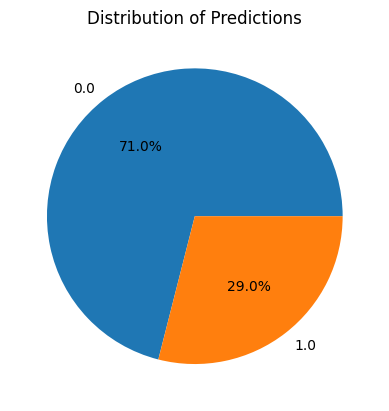

In [43]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in the prediction
counts = predictions_df['IS_HCP'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Predictions')

# Display the chart
plt.show()


In [45]:
data

,IS_HCP,fasting,pharmacogenetics,primary,syndrome,allergens,neuropathology,nervous,vocal,purpura,...,central,myelodysplastic,blockade,empyema,arrest,control,pain,vka,sclerosis,post-exposure
ID,,,,,,,,,,,,,,,,,,,,,
1001,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114933,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114934,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114935,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
predictions_df.to_csv("Final_Prediction_submission.csv", index=False)


In [47]:
data_test

,fasting,pharmacogenetics,primary,syndrome,allergens,neuropathology,nervous,vocal,purpura,tabes,...,central,myelodysplastic,blockade,empyema,arrest,control,pain,vka,sclerosis,post-exposure
ID,,,,,,,,,,,,,,,,,,,,,
115501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
143991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Assuming you have your data stored in X (feature matrix) and Y (target variable)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert the target variable to categorical if needed
num_classes = np.unique(Y_train).shape[0]
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Create a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions on the test data
Y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate the accuracy of the model
accuracy = accuracy_score(np.argmax(Y_test, axis=1), Y_pred)
print("Accuracy:", accuracy)

# Generate the classification report
report = classification_report(np.argmax(Y_test, axis=1), Y_pred)
print("Classification Report:")
print(report)


In [ ]:
data_tax = pd.read_csv('Manupulated_data.csv')

In [ ]:
columns_removed = ['DEVICETYPE','PLATFORM_ID','BIDREQUESTIP','USERPLATFORMUID','USERCITY','PLATFORMTYPE',
                   'USERZIPCODE','USERAGENT','CHANNELTYPE','URL','KEYWORDS','IS_HCP','ID','Unnamed: 0']
data_tax = data_tax.drop(columns=columns_removed)

In [ ]:
data_tax = data_tax.dropna()

In [ ]:
data_tax

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each category
category_counts = data_tax['TAXONOMY'].value_counts()

# Filter categories with count greater than 1
filtered_category_counts = category_counts[category_counts > 30]

# Plot the filtered frequency
plt.figure(figsize=(10, 6))
filtered_category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Categories (Count > 30)')
plt.show()
print(filtered_category_counts.nunique())

Following the central limit rule it won't be appropriatte to evaualte the categories which has data less than 30 values to train so removing those values from my dataset

In [ ]:
# Calculate the frequency of each category
category_counts = data_tax['TAXONOMY'].value_counts()

# Filter categories with count greater than 30
data_tax = data_tax[data_tax['TAXONOMY'].isin(category_counts[category_counts > 30].index)]

# Print the filtered DataFrame
data_tax


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



# Use LabelEncoder to encode the target codes as integers
label_encoder = LabelEncoder()
data_tax['TAXONOMY_data'] = label_encoder.fit_transform(data_tax['TAXONOMY'])




In [ ]:
X= data_tax.drop(columns=['TAXONOMY','TAXONOMY_data'])
Y = data_tax['TAXONOMY']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 ,random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(max_leaf_nodes=800)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [ ]:
 def random_forest(i):
    
    rf_classifier = RandomForestClassifier(max_depth=i,max_leaf_nodes=1000 , random_state=42)

    # Train the classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the classifier's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy, " ", i)